This notebook is the first tutorial to illustrate feature selection. More complex solution is represented in other notebook. First solution illustrates how feature solution with **Random Forest**

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",header=None)
df.columns = ['ClassLabel','Alcolhol','MalicAcid','Ash','AlcalinityOfAsh','Magnesium','TotalPhenols','Flavanoids',\
              'NonflavanoidPhenols','Proanthocyans','ColorIntensity','hue','dilutedWines','Proline']
df.head()

,ClassLabel,Alcolhol,MalicAcid,Ash,AlcalinityOfAsh,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyans,ColorIntensity,hue,dilutedWines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# generate train/ testset
X, y = df.iloc[:,1:].values, df.iloc[:,0].values
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [6]:
feat_labels =df.columns[1:]
rf = RandomForestClassifier(n_estimators=100,random_state=0, n_jobs=-1)
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [9]:
importances =rf.feature_importances_
indices = np.argsort(importances)[::-1]

In [13]:
for f in range(X_train.shape[1]):
    print("%2d) %- *s %f" % (f+1,30,feat_labels[f], importances[indices[f]]))

 1) Alcolhol                       0.194819
 2) MalicAcid                      0.164348
 3) Ash                            0.145228
 4) AlcalinityOfAsh                0.119075
 5) Magnesium                      0.088747
 6) TotalPhenols                   0.080266
 7) Flavanoids                     0.061579
 8) NonflavanoidPhenols            0.039190
 9) Proanthocyans                  0.029782
10) ColorIntensity                 0.023107
11) hue                            0.022962
12) dilutedWines                   0.016638
13) Proline                        0.014258


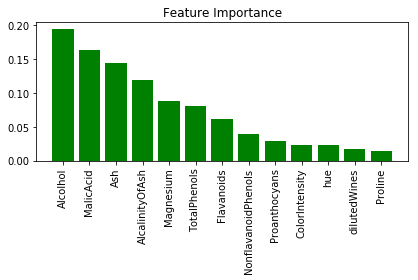

In [19]:
import matplotlib.pyplot as plt
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices],color='green',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

The different features in the Wine dataset are ranked by their relative importance. Note that feature importances are normalized so that they sum up to 1.0. From the plot we can see that the alcohol content of wine is the most discriminative feature in the dataset based on the average impurity decrease in the 100 decision trees.